<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic-Survival" data-toc-modified-id="Titanic-Survival-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Titanic Survival</a></span><ul class="toc-item"><li><span><a href="#Augmenting-the-data" data-toc-modified-id="Augmenting-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Augmenting the data</a></span></li></ul></li><li><span><a href="#Select-and-split-the-data" data-toc-modified-id="Select-and-split-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Select and split the data</a></span><ul class="toc-item"><li><span><a href="#Normalising-the-data" data-toc-modified-id="Normalising-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Normalising the data</a></span></li></ul></li><li><span><a href="#Score-the-model" data-toc-modified-id="Score-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Score the model</a></span><ul class="toc-item"><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Titanic Survival

This is a classic machine learning classification problem. The dataset is avaiable to be downloaded from Kaggle.

The most common algorithm for binary classification is Logistic Regression. This algorithm takes in a data point and assigns a probability of the data point belonging to one class or the other via a sigmoid function.

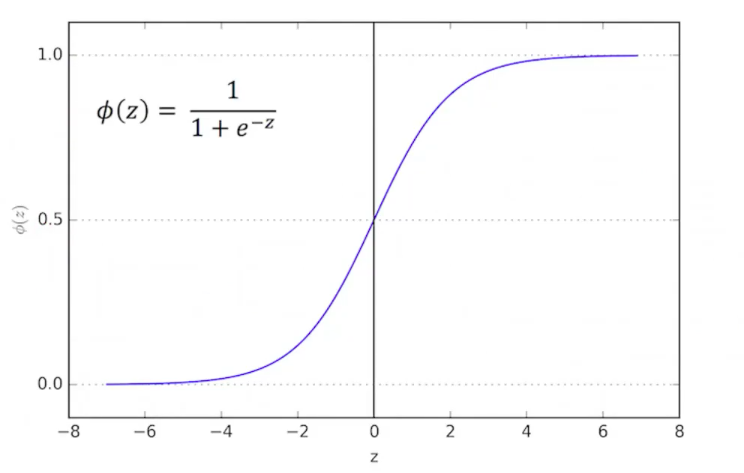

The threshold is typically at 0.5, i.e. when the data point is entered into the logistic regression function and the output is >0.5, Class B is predicted, and if the function outputs <=0.5, Class A is predicted.

In this project, the binary classes are `1` and `0` - i.e. 
* `Class 1` means the passenger survived
* `Class 0` means the passenger did not survive.

In [4]:
passengers = pd.read_csv('passengers.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some of the columns that could affect survival would be sex, age, Pclass (possibly?) 

## Augmenting the data

In [5]:
# Update sex column to numerical
male_or_female = lambda sex: 1 if sex =='female' else 0
passengers['Sex'] = passengers['Sex'].apply(male_or_female)

In [6]:
# Fill the nan values in the age column
# makes sense to update these values to be the mean age
# using the built-in Pandas function .fillna() to update the nan values with mean age:
passengers = passengers.fillna(value={'Age':passengers.Age.mean()})

In [9]:
passengers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Create a first class column
first_class = lambda Pclass: 1 if Pclass == 1 else 0
passengers['FirstClass'] = passengers['Pclass'].apply(first_class)
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FirstClass'],
      dtype='object')

In [12]:
# Create a second class column
second_class = lambda Pclass: 1 if Pclass == 2 else 0
passengers['SecondClass'] = passengers['Pclass'].apply(second_class)

# Select and split the data

In [13]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, survival, test_size=0.2)

## Normalising the data

In [15]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
training_features = scaler.fit_transform(X_train)
test_features = scaler.fit_transform(X_test)

In [16]:
# Fitting the model will perform gradient descent
# the goal is to find the feature coefficients that minimize the log-loss for the training data.
model = LogisticRegression()
model.fit(training_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Score the model

In [18]:
# scoring on the training data

model.score(training_features, y_train)

0.7865168539325843

In [19]:
# scoring on the test data

model.score(test_features, y_test)

0.8324022346368715

So currently, the test score is better than the training score with ~83% vs 79%.

The model has not overfit the training data which is great.

## Feature importance

In [20]:
print(model.coef_)

[[ 1.14029938 -0.43495738  0.93932279  0.47332605]]


In [22]:
features.columns

Index(['Sex', 'Age', 'FirstClass', 'SecondClass'], dtype='object')

So, the first feature - `Sex` - is the most important, and the second most important feature is `FirstClass`.